# TP 7 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
import cv2

In [2]:
from functions import *

In [3]:
%load_ext autoreload
%autoreload 2

***
## 1 - Aplicar la operación de dilación a la imagen de la izquierda siendo el elemento estructural:
#### B = [0, 1, 0; 1, 1, 1; 0, 1, 0]
(Broken_Text.tif)

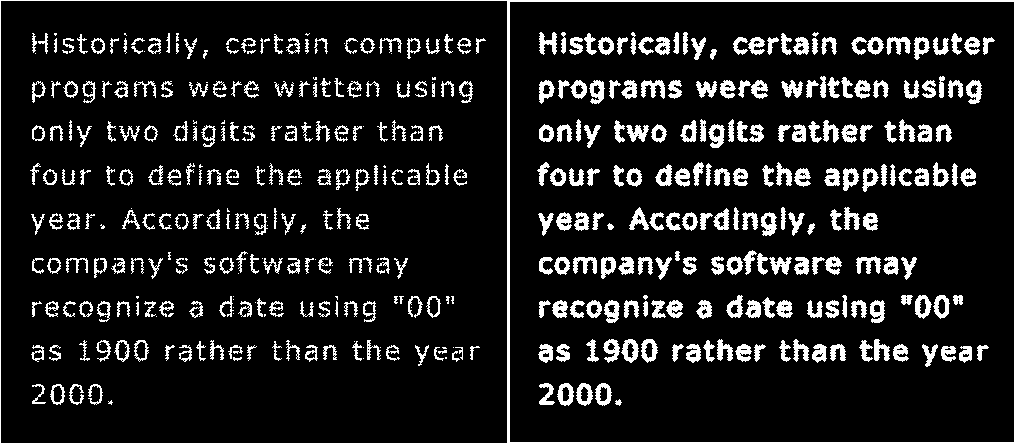

In [40]:
# Reading the input image
text = cv2.imread("img/Broken_Text.tif")
 
kernel = np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype=np.uint8)
 
text_dilation = cv2.dilate(text, kernel, iterations=1)
 
h, w = text.shape[:2]
comparison = np.concatenate([text, text_dilation], axis=1)

displayImage_fromcv2(comparison, 2*w, h)

***
## 2 - Reproducir el siguiente ejemplo
![](img/2.png)


Levantamos la imagen

In [41]:
noisy_sqares = cv2.imread("img/Noisy_Squares.tif")

## Erosion con elemento cuadrado de 13px de lado

In [42]:
kernel = np.ones((13, 13), np.uint8)
erode_squares = cv2.erode(noisy_sqares, kernel) 

## Dilatacion con elemento cuadrado de 13px de lado

In [43]:
kernel = np.ones((13, 13), np.uint8)
dilate_squares = cv2.dilate(erode_squares, kernel) 

### Resultado

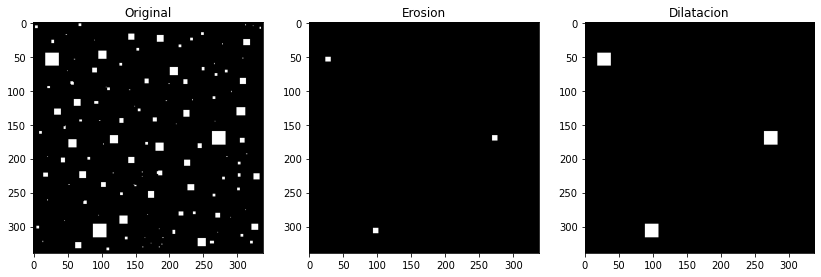

In [44]:
images = {'Original':noisy_sqares,
          'Erosion':erode_squares,
          'Dilatacion':dilate_squares
        }
compare(images)


***
## 3 - Aplicar la operación de apertura a la figura (b) con el elemento estructural (a) el radio del elemento estructural debe ser variable de manera que el usuario pueda interactuar desde el programa
![](img/3.png)

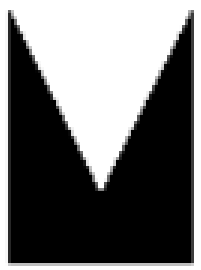

In [45]:
figb = cv2.imread("img/fig3.png")
h, w = figb.shape[:2]
displayImage_fromcv2(figb, w, h)

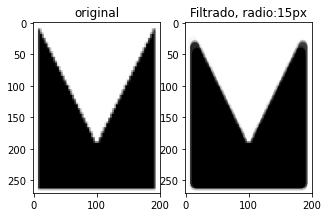

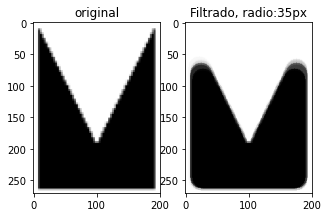

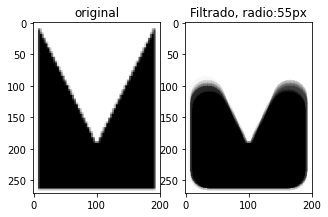

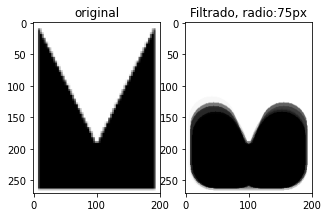

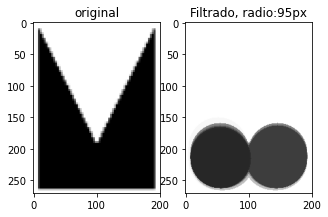

In [59]:
radius = [15,35,55,75,95]
for rad in radius:
  kernel = circular_kernel(rad)
  inverted_figb = cv2.bitwise_not(figb)
  inverted_opening = cv2.morphologyEx(inverted_figb, cv2.MORPH_OPEN, kernel)
  opening = cv2.bitwise_not(inverted_opening)
  images = {'original':figb,
            'Filtrado, radio:'+str(rad)+'px':opening
          }
  compare(images,size=(5,5))

***
## 4 - Extraer el contorno de la figura izquierda
![](img/4.png)

Levantamos la imagen

In [ ]:
lincoln = cv2.imread("img/Lincoln from penny.tif")

Erosionamos con un kernel cuadrado donde el tamaño de la matriz definira el ancho de la linea de contorno.<br>
Finalmente obtenemos el contorno restando el resultado con la imagen original

In [ ]:
kernel = np.ones((4, 4), np.uint8)
lincoln_eroded = cv2.erode(lincoln, kernel) 
lincoln_outline =  lincoln - lincoln_eroded

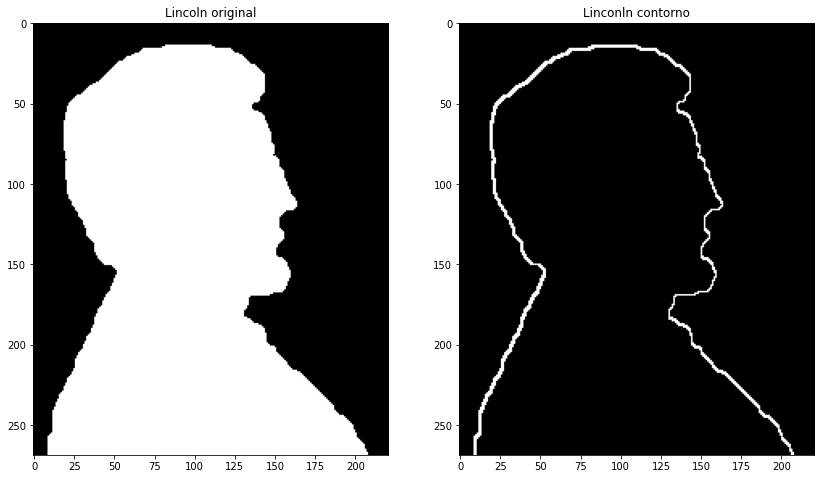

In [ ]:
images = {'Lincoln original':lincoln,
          'Linconln contorno':lincoln_outline
        }
compare(images)

***
## 5 - Investigar qué es (y dar ejemplos) de:
#### Hit and miss

La transformación Hit or Miss es una operación morfológica que detecta la ocurrencia de un patrón dado por un set de elementos estructurales en una imagen binaria. Puede devolver un set de posiciones donde los elementos estructurales coinciden completamente con la imagen, y también un set donde no coinciden en absoluto.

#### Thinning

Thinning se utiliza para quitar pixeles del _foreground_ (comúnmente pixeles blancos o 1s) de una imagen binaria. En particular, es típicamente utilizado para lograr la esqueletización (_skeletonization_) de un elemento. Esto implica quedarse con una imagen simplificada, pero topológicamente equivalente.

#### Dado que el thinning se puede realizar con la técnica de Hit and Miss, daremos un ejemplo que hace exactamente eso:

Original Image


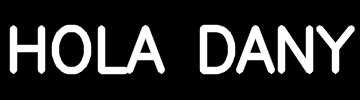

Thinned Image


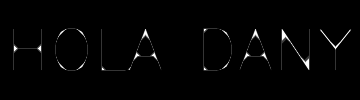

Binarized Thinned


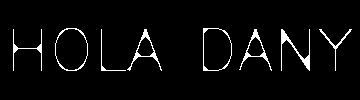

In [75]:
# Create an image with text on it
img = np.zeros((100,360),dtype='uint8')
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'HOLA DANY',(5,70), font, 2,(255),5,cv2.LINE_AA)
print("Original Image")
displayImage_fromcv2(img, img.shape[1], img.shape[0])

img1 = img.copy()

# Structuring Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

for i in range(5):
    output_image_thin = img1.copy()
    img1 = cv2.morphologyEx(img1, cv2.MORPH_HITMISS, kernel)

print("Thinned Image")
displayImage_fromcv2(output_image_thin, output_image_thin.shape[1], output_image_thin.shape[0])

# Arreglando diferencias en brillo convirtiendo la imagen en binaria
output_image_thin[output_image_thin != 0] = 255
print("Binarized Thinned")
displayImage_fromcv2(output_image_thin, output_image_thin.shape[1], output_image_thin.shape[0])

#### Thickening

El thickening es una operación dual respecto al thinning. Es equivalente a aplicar la misma estrategia en el set complementario al que se quiere engruesar.

Complement of thin image


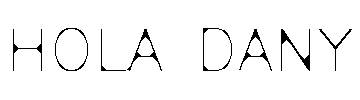

Thickened Image


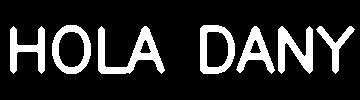

In [76]:
img2 = cv2.bitwise_not(output_image_thin)
print("Complement of thin image")
displayImage_fromcv2(img2, img2.shape[1], img2.shape[0])

for i in range(4):
    output_image_thick = img2.copy()
    img2 = cv2.morphologyEx(img2, cv2.MORPH_HITMISS, kernel)

output_image_thick = cv2.bitwise_not(output_image_thick)

print("Thickened Image")
displayImage_fromcv2(output_image_thick, output_image_thick.shape[1], output_image_thick.shape[0])

#### Top-hat transform

La transformada _top-hat_ es una operación que se utiliza para extraer elementos pequeños o detalles de imagenes. Existen dos tipos de transformada top-hat: la blanca y la negra. La blanca se define como la diferencia entre la imagen de entrada y su apertura con un elemento estructural. La negra es la diferencia entre el cierre de la imagen con el elemento estructural y la imagen original.

En el primer ejemplo la usamos para remover objetos grandes y brillantes de una imagen, con el fin de apreciar mejor los detalles pequeños.

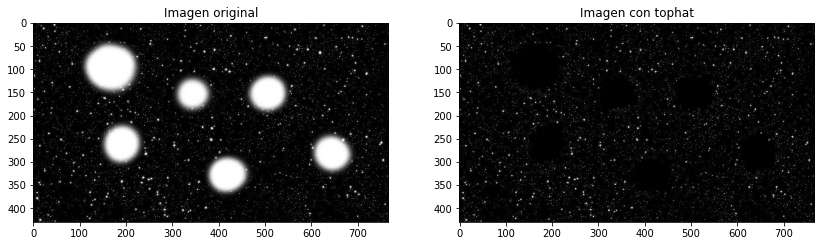

In [132]:
cosmos = cv2.imread('img/Cosmos_original.jpg')
filter_size = (5,5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filter_size)
cosmos_tophat = cv2.morphologyEx(cosmos, cv2.MORPH_TOPHAT, kernel)

images = {'Imagen original':cosmos,
          'Imagen con tophat':cosmos_tophat
        }
compare(images)

En el segundo ejemplo, utilizamos top-hat para equalizar la iluminación despareja de la imagen. Esto mejora los resultados de la operación de thresholding.

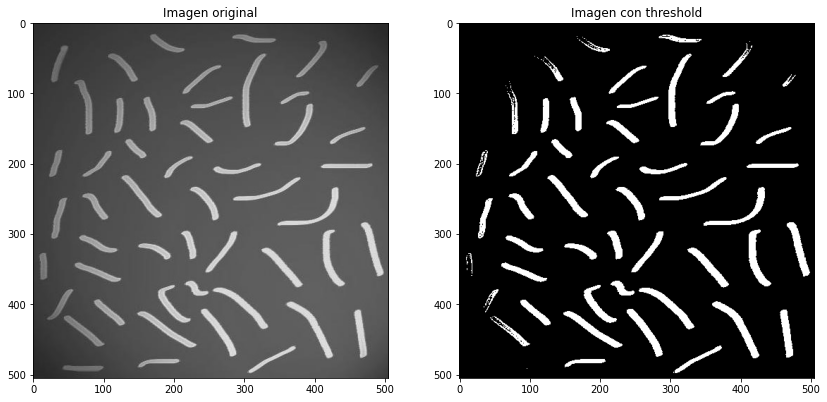

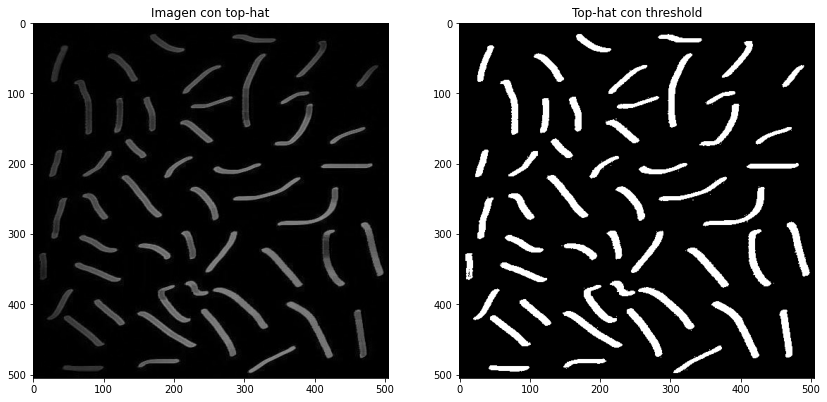

In [131]:
lighting = cv2.imread('img/Lighting_original.jpg')

thresh = 0.5*255

thresh_1 = lighting.copy()
thresh_1[thresh_1 < thresh] = 0
thresh_1[thresh_1 > thresh] = 255

images = {'Imagen original':lighting,
          'Imagen con threshold':thresh_1
        }
compare(images)

# Getting the kernel to be used in Top-Hat
filterSize =(10,10)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, filterSize)
  
# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(lighting, cv2.MORPH_TOPHAT, kernel)

thresh_2 = tophat_img.copy()
thresh_2[thresh_2 < 0.1*255] = 0
thresh_2[thresh_2 > 0.1*255] = 255

images = {'Imagen con top-hat':tophat_img,
          'Top-hat con threshold':thresh_2
        }
compare(images)